In [1]:
#walmart dataframe questions/homelessness dataframe questions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df_walmart = pd.read_csv('https://raw.githubusercontent.com/julito14/Data-Manipulation-w-Pandas-Project-1/main/sales_subset.csv')
df_walmart = df_walmart.drop(columns = 'Unnamed: 0')

In [3]:
df_walmart.head(5)
df_walmart.describe()

,store,department,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment
count,10774.000000,10774.000000,10774.000000,10774.000000,10774.000000,10774.000000
mean,15.441897,45.218118,23843.950149,15.731978,0.749746,8.082009
std,11.534511,29.867779,30220.387557,9.922446,0.059494,0.624355
min,1.000000,1.000000,-1098.000000,-8.366667,0.664129,3.879000
25%,4.000000,20.000000,3867.115000,7.583333,0.708246,7.795000
50%,13.000000,40.000000,12049.065000,16.966667,0.743381,8.099000
75%,20.000000,72.000000,32349.850000,24.166667,0.781421,8.360000
max,39.000000,99.000000,293966.050000,33.827778,1.107674,9.765000


In [4]:
# QUESTION 1. Print the highest weekly sales for 'department' in the 'walmart' dataframe. Limit your results
#to the top 5 departments in descending order.

#sorts the dataframe by weekly sales and then department
print(df_walmart.sort_values(['weekly_sales','department'],
                             
                             #lists results starting with highest weekly sales
                             ascending = [False,False])
      
      #groups by 'department' column
      .groupby('department')
      
      #returns the first result of each group, then the first 5 departments by weekly sales
      .head(1).head(5))

      store type  department        date  weekly_sales  is_holiday  \
6201     14    A          92  2010-02-05     293966.05       False   
4271     10    B          72  2010-02-05     232558.51       False   
6237     14    A          95  2010-02-05     213042.66       False   
6177     14    A          90  2010-02-05     166263.81       False   
6189     14    A          91  2010-02-05     162497.78       False   

      temperature_c  fuel_price_usd_per_l  unemployment  
6201      -2.605556              0.735455         8.992  
4271      12.411111              0.782478         9.765  
6237      -2.605556              0.735455         8.992  
6177      -2.605556              0.735455         8.992  
6189      -2.605556              0.735455         8.992  


In [5]:
# QUESTION 2. What was the 'nb_sold' of avocados in 2017 in the 'avocado' dataframe?

df_avocado = pd.read_pickle("avoplotto (1).pkl")
df_avocado.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [6]:
df_avocado_2017 = df_avocado[df_avocado['year']==2017]
df_avocado_2017['nb_sold'].sum()
#total num sold in 2017 is 1,247,017,683.33

1247017683.22

In [7]:
# 2. EXTRA PART: what was the number of 'organic' avocados in 2017?

df_avocado_2017_org = df_avocado_2017[df_avocado_2017['type']=='organic']
df_avocado_2017_org['nb_sold'].sum()

23321281.07

In [8]:
# QUESTION 3:Create a bar plot of the total number of homeless people by region in the 'homelessness' dataframe. 
# Order the bars in descending order.
#BONUS: create a horizontal bar chart

df_homeless = pd.read_csv('homelessness.csv')
df_homeless.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


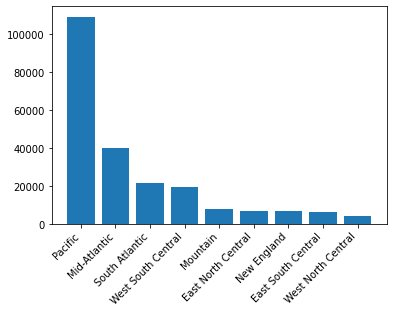

In [9]:

# Sort the DataFrame by 'individuals' column in descending order
df_homeless_sorted = df_homeless.sort_values('individuals', ascending=False)

# Create the bar plot
plt.bar(df_homeless_sorted['region'], df_homeless_sorted['individuals'])

plt.xticks(rotation=45, ha = 'right',va='top')

plt.show()


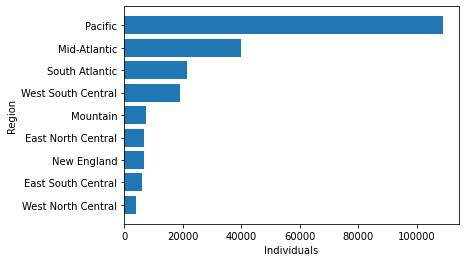

In [28]:
#BONUS CHART
df_homeless_sorted = df_homeless.sort_values('individuals', ascending=False)
plt.barh(df_homeless_sorted['region'], df_homeless_sorted['individuals'])

plt.gca().invert_yaxis()

plt.xlabel("Individuals")
plt.ylabel("Region")
plt.show()


In [11]:
#Alternate method

homeless_per_region = df_homeless.groupby('region').agg({'individuals' : 'sum'}).sort_values('individuals',ascending = True)
print(homeless_per_region)

                    individuals
region                         
East South Central      12468.0
New England             12903.0
West North Central      13971.0
East North Central      25406.0
West South Central      26842.0
Mountain                28491.0
South Atlantic          52260.0
Mid-Atlantic            54038.0
Pacific                142136.0


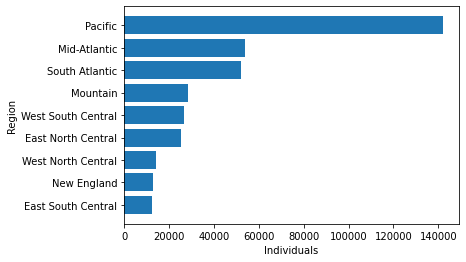

In [12]:
plt.barh(homeless_per_region.index, homeless_per_region.individuals)
plt.xlabel("Individuals")
plt.ylabel("Region")
plt.show()


In [13]:
temp = pd.read_csv('temperatures.csv')
temp.head()

,Unnamed: 0,date,city,country,avg_temp_c
0,0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [14]:
temp_toronto = temp[temp['city']=='Toronto']
temp_toronto.head()

temp_rome = temp[temp['city']=='Rome']
temp_rome.tail()

,Unnamed: 0,date,city,country,avg_temp_c
13030,13030,2013-05-01,Rome,Italy,14.863
13031,13031,2013-06-01,Rome,Italy,19.338
13032,13032,2013-07-01,Rome,Italy,23.375
13033,13033,2013-08-01,Rome,Italy,23.556
13034,13034,2013-09-01,Rome,Italy,NaN


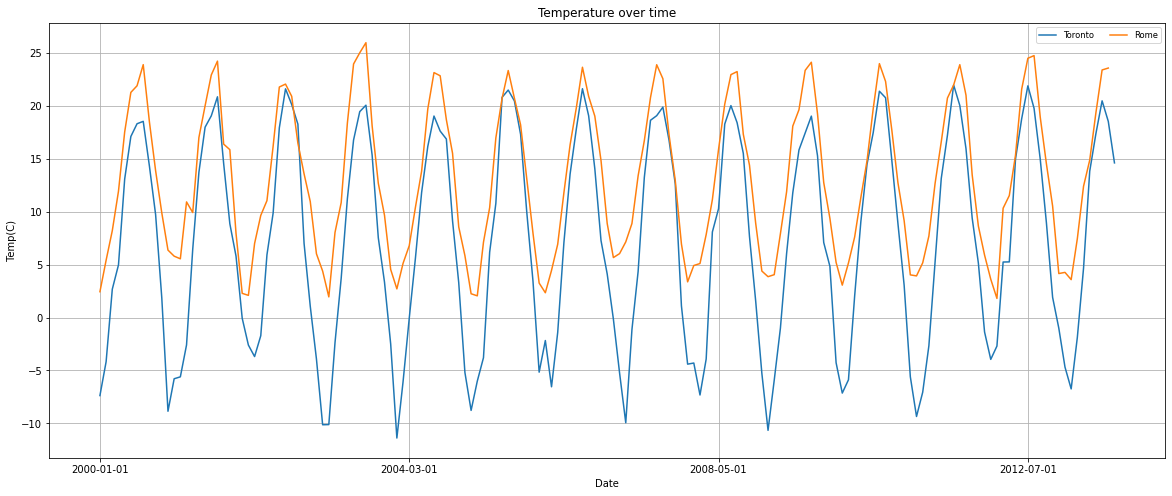

In [15]:
plt.figure(figsize = (20, 8))
plt.grid(True)
plt.plot(temp_toronto['date'],temp_toronto['avg_temp_c'], label = 'Toronto')
plt.plot(temp_toronto['date'],temp_rome['avg_temp_c'], label = 'Rome')
plt.xticks(temp_toronto['date'][::50])
plt.xlabel('Date')
plt.ylabel(' Temp(C) ')
plt.title('Temperature over time')

plt.legend(loc='upper right', ncol=2, fontsize='small')

plt.show()